# Analyze dynamics and frequency spectra of filaments driven with a constant compressive tip follower-force

In [38]:
import sys
if 'init_modules' in globals().keys():
    # second or subsequent run: remove all but initially loaded modules
    for m in sys.modules.keys():
        if m not in init_modules:
            del(sys.modules[m])
else:
    # first run: find out which modules were initially loaded
    init_modules = sys.modules.keys()
    
import numpy as np
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import interpolate
import pandas as pd

import os
import pyfilaments.analysisutils as analysis
import imp
imp.reload(analysis)
%matplotlib notebook
import _figure_parameters
plt.close('all')

In [22]:
# Load a constant compressive load file.
# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ConstantCompressiveActivity_sweep/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.0128205128205128_activityTime_750_simType_point/SimResults_00_.hdf5'

# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ConstantCompressiveActivity_sweep/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_0.5_activityTime_750_simType_point/SimResults_00_.hdf5'

file = '/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/2022-12-26/SimData_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_0.1_activityTime_750_simType_lacry/sim_data_00_.hdf5'

filament = analysis.analysisTools(file = file)

In [23]:
# Frequency-spectrum of filament dynamics to extract the fundamental frequency
filament.compute_base_tip_angle()

start_index = int(filament.Nt/2)
end_index = int(filament.Nt)

time_array = filament.Time[start_index:end_index]
time_series_data = filament.derived_data['base tip angle'][start_index:end_index]
time_series_data = time_series_data - np.mean(time_series_data)
N_signal = len(time_series_data)

In [24]:
### FFT of the base tip angle time-series data
from scipy.fft import rfft, rfftfreq

SAMPLE_RATE = filament.Nt/(max(filament.Time))

print('Time series sample rate: {}'.format(SAMPLE_RATE))
yf = rfft(time_series_data)
xf = rfftfreq(N_signal, 1 / SAMPLE_RATE)

Time series sample rate: 0.20002666666666666


In [25]:
# Find the dominant frequency
clip_point = int(len(xf)/5)
idx = np.argmax(np.abs(yf))

freq_dom = np.abs(xf)[idx]
cycle_time = 1/freq_dom
print('Flapping freq: {} cycles/time'.format(freq_dom))
print('Flapping time: {}'.format(cycle_time))

Flapping freq: 0.0006399146894161556 cycles/time
Flapping time: 1562.708305559259


<IPython.core.display.Javascript object>


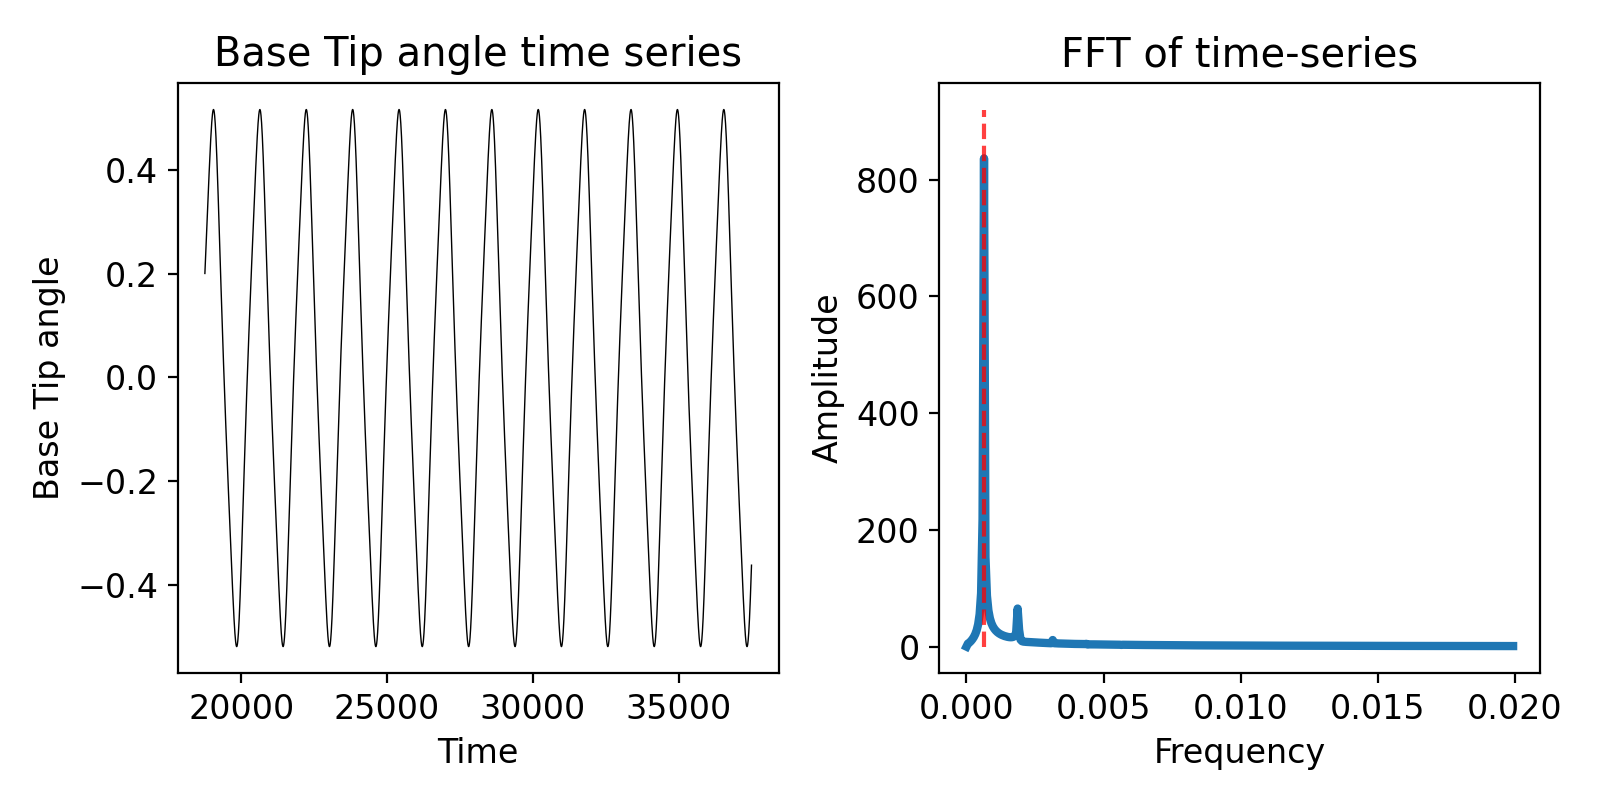

In [26]:
# Plot the time series and the FFT spectrum
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols = 2, figsize = (8, 4))


ax0.plot(time_array, time_series_data,color = 'k', linewidth = 0.5)
ax0.set_xlabel('Time')
ax0.set_ylabel('Base Tip angle')
ax0.set_title('Base Tip angle time series')

ax1.plot(xf[:clip_point], np.abs(yf[:clip_point]), linewidth = 3)
# Draw the forcing frequency
plt.vlines(freq_dom, 0, np.max(np.abs(yf[:clip_point]))+np.max(np.abs(yf[:clip_point]))/10, color = 'r', linestyle = '--',zorder=100, alpha = 0.75)
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Amplitude')
ax1.set_title('FFT of time-series')
plt.tight_layout()

# Save the plot
# plt.savefig(os.path.join(file_path, 'filament_time_series_fft.png'), dpi = 300)
# plt.savefig(os.path.join(file_path, 'filament_time_series_fft.svg'), dpi = 300)

plt.show()

In [27]:
# 
filament.time_scales()
filament.compute_scales()
filament.compute_dimensionless_groups()       
            

**************************************************
Time-scales
**************************************************
Stretch relzation time: 0.43
Bend relaxation time: 228072.75
Active motility time-scale: 10.0
31
**************************************************
Dimensionless numbers
**************************************************
Force per unit lenth due to activity: 0.00026
Activity number: 166.8296
**************************************************


In [15]:
from scipy.fft import rfft, rfftfreq

def compute_filament_freq(filament = None, plot = False):
    filament.compute_base_tip_angle()

    start_index = int(filament.Nt/2)
    end_index = int(filament.Nt)

    time_array = filament.Time[start_index:end_index]
    time_series_data = filament.derived_data['base tip angle'][start_index:end_index]
    time_series_data = time_series_data - np.mean(time_series_data)
    N_signal = len(time_series_data)
    
    ### FFT of the base tip angle time-series data

    SAMPLE_RATE = filament.Nt/(max(filament.Time))

    print('Time series sample rate: {}'.format(SAMPLE_RATE))
    yf = rfft(time_series_data)
    xf = rfftfreq(N_signal, 1 / SAMPLE_RATE)
    
    # Find the dominant frequency
    clip_point = int(len(xf)/5)
    idx = np.argmax(np.abs(yf))

    freq_dom = np.abs(xf)[idx]
    cycle_time = 1/freq_dom
    print('Flapping freq: {} cycles/time'.format(freq_dom))
    print('Flapping time: {}'.format(cycle_time))
    
    
    if plot:
        fig, (ax0, ax1) = plt.subplots(nrows=1, ncols = 2, figsize = (8, 4))
        ax0.plot(time_array, time_series_data,color = 'k', linewidth = 0.5)
        ax0.set_xlabel('Time')
        ax0.set_ylabel('Base Tip angle')
        ax0.set_title('Base Tip angle time series')

        ax1.plot(xf[:clip_point], np.abs(yf[:clip_point]), linewidth = 3)
        # Draw the forcing frequency
        plt.vlines(freq_dom, 0, np.max(np.abs(yf[:clip_point]))+np.max(np.abs(yf[:clip_point]))/10, color = 'r', linestyle = '--',zorder=100, alpha = 0.75)
        ax1.set_xlabel('Frequency')
        ax1.set_ylabel('Amplitude')
        ax1.set_title('FFT of time-series')
        plt.tight_layout()

        # Save the plot
        # plt.savefig(os.path.join(file_path, 'filament_time_series_fft.png'), dpi = 300)
        # plt.savefig(os.path.join(file_path, 'filament_time_series_fft.svg'), dpi = 300)

        plt.show()
        
    return freq_dom
        
    

In [112]:
# data_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/ConstantCompressiveActivity_sweep/FinalSims'

data_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/ConstantCompressiveActivity_sweep/LacryDistribution'

save_file = 'flapping_freq.csv'

overwrite = False

df_freq = pd.DataFrame({})

if not os.path.exists(os.path.join(data_folder, save_file)) or overwrite == True:
    # Walk through the folders and identify the simulation data files
    for dirs, subdirs, files in os.walk(data_folder, topdown=False):

        root, subFolderName = os.path.split(dirs)

        for file in files:
            if(file.endswith('hdf5')):
                filament = analysis.analysisTools(file = os.path.join(dirs, file))

                freq = compute_filament_freq(filament = filament, plot = True)
                filament.time_scales()
                filament.compute_scales()
                filament.compute_dimensionless_groups()  
                
                tau_bend = filament.tau_bend

                df_freq = df_freq.append(pd.DataFrame({'potDipole strength':[filament.D0], 
                                       'Activity number':[filament.activity_number], 'Frequency':[freq], 
                                       'Bending time-scale':[tau_bend]}))
    # Save the freq-data to file
    df_freq.to_csv(os.path.join(data_folder, save_file))
    
else:
    print('Loading data from file ...')
    
    df_freq = pd.read_csv(os.path.join(data_folder, save_file))
            



Loading data from file ...


In [85]:
df_freq

,Unnamed: 0,potDipole strength,Activity number,Frequency,Bending time-scale
0,0,0.336842,18.127495,0.00014,228072.74616
1,0,0.573684,30.873389,0.00028,228072.74616
2,0,0.857895,46.168463,0.00050,228072.74616
3,0,0.478947,25.775032,0.00022,228072.74616
4,0,0.952632,51.266821,0.00062,228072.74616
5,0,0.384211,20.676674,0.00016,228072.74616
6,0,0.621053,33.422568,0.00032,228072.74616
7,0,0.242105,13.029137,0.00008,228072.74616
8,0,0.431579,23.225853,0.00020,228072.74616
9,0,0.194737,10.479958,0.00006,228072.74616


In [113]:
tau_bend = np.unique(df_freq['Bending time-scale'])

assert len(tau_bend)==1, 'Material properties of filaments used not constant!'

In [114]:


# Fit a power-law to the data
from scipy.optimize import curve_fit

def f(x, A):
    
    return A*tau_bend*x**(-4/3)


def f1(x, A, B):
    
    return A*tau_bend*x**(B)

xdata = np.array(df_freq['Activity number'])
ydata = np.array(1/df_freq['Frequency'])

# popt, pcov = curve_fit(f, xdata, ydata)

popt, pcov = curve_fit(f1, xdata, ydata)

A_opt = popt[0]
B_opt = popt[1]

print(A_opt)
print(B_opt)

xdata_fine = np.linspace(min(xdata), max(xdata), 50)

# y_fit = np.array([f(x, A_opt) for x in xdata_fine])

y_fit = np.array([f1(x, A_opt, B_opt) for x in xdata_fine])


idx = np.argsort(xdata_fine)

xdata_fine = xdata_fine[idx]
# ydata = ydata[idx]
y_fit = y_fit[idx]

print(xdata)

8.400746057107128
-1.3807883494125004
[ 296.58595556  918.45973333 1291.584      1042.83448889  172.2112
  794.08497778  545.33546667  669.71022222  420.96071111 1167.20924444]


<IPython.core.display.Javascript object>


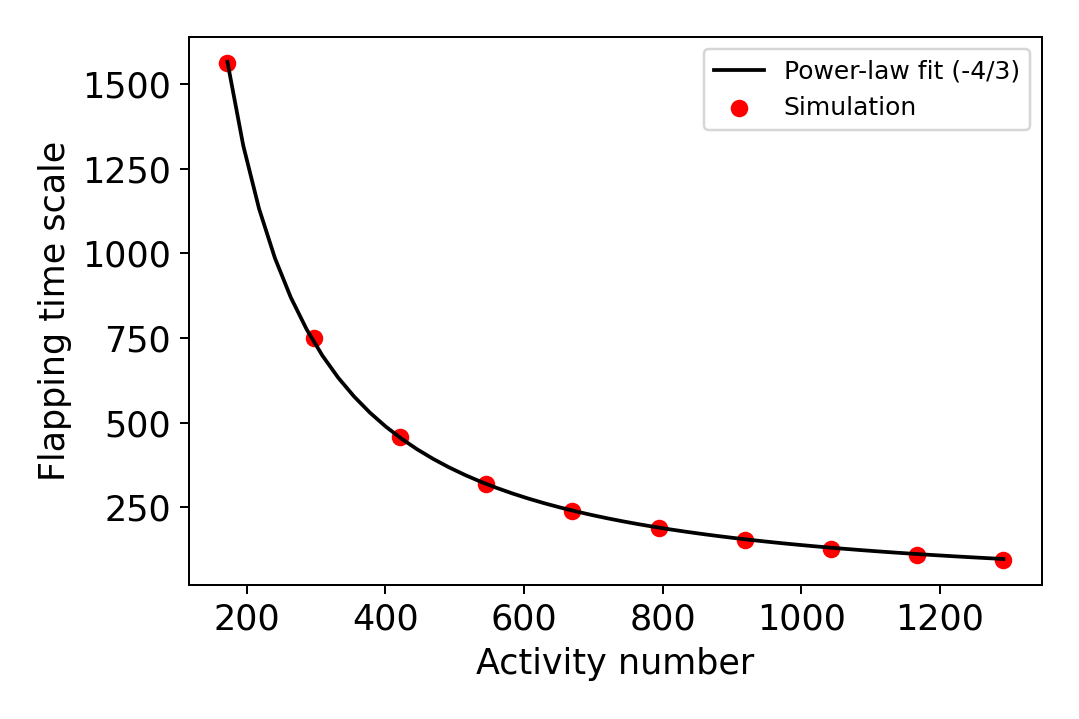

In [115]:
# Plot Flapping freq vs activity strength
file_path = '/home/deepak/Dropbox/LacryModeling/ActiveFilamentsManuscript/Figures/Validation'
save = False

plt.figure(figsize=(6,4))
title = 'FlappingTime_vs_activityStrength_TipActivity'
# Predicted power law
plt.plot(xdata_fine, y_fit, color = 'k', label ='Power-law fit (-4/3)')
plt.scatter(xdata, ydata, color = 'r', label = 'Simulation')


plt.xlabel('Activity number')
plt.ylabel('Flapping time scale')
plt.legend()
# plt.xscale('log')
# plt.yscale('log')
# plt.xlim([15, 60])
# plt.ylim([100, 10000])
plt.tight_layout()
if save:
    plt.savefig(os.path.join(file_path, title+'.png'), dpi = 300)
    plt.savefig(os.path.join(file_path, title+'.svg'), dpi = 300)
plt.show()

# Results

### Power-law fit (Lacry/Uniform dist)
$\tau_{flapping} = 6.50~(\mu L^4/\kappa)\mathcal{A}^{-4/3}$

( Free power-law fit )
$\tau_{flapping} = 8.4~(\mu L^4/\kappa)\mathcal{A}^{-1.38}$


### Power-law fit (Tip activity)
$\tau_{flapping} = 1.58~(\mu L^4/\kappa)*\mathcal{A}^{-4/3}$

( Free power-law fit )
$\tau_{flapping} = 2.2~(\mu L^4/\kappa)\mathcal{A}^{-1.45}$

In [116]:
# Extrapolate the flapping-time plot to higher activity numbers

x_extended = np.linspace(min(xdata), 1*max(xdata), 50)

# y_extended_fit = np.array([f(x, A_opt) for x in x_extended])

y_extended_fit = np.array([f1(x, A_opt, B_opt) for x in x_extended])


idx = np.argsort(x_extended)

x_extended = x_extended[idx]
# ydata = ydata[idx]
y_extended_fit = y_extended_fit[idx]

<IPython.core.display.Javascript object>


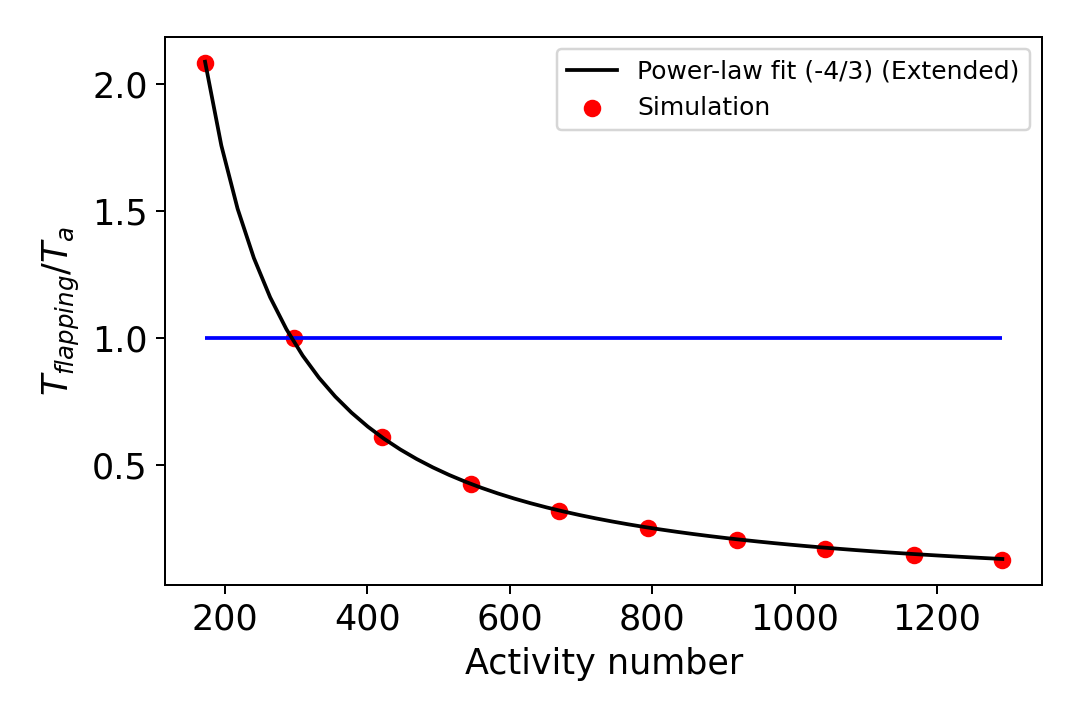

In [117]:
save = True

tau_drive = 750

plt.figure(figsize=(6,4))
title = 'FlappingTime_vs_activityStrength_DistActivity_Extended_FitPowerLaw'
# Predicted power law
plt.plot(x_extended, y_extended_fit/tau_drive, color = 'k', label ='Power-law fit (-4/3) (Extended)')
plt.scatter(xdata, ydata/tau_drive, color = 'r', label = 'Simulation')

plt.hlines(y = tau_drive/tau_drive, xmin=min(x_extended), xmax=max(x_extended), color='b')

plt.xlabel('Activity number')
plt.ylabel('$T_{flapping}/T_{a}$')
plt.legend()
# plt.xscale('log')
# plt.yscale('log')
# plt.xlim([15, 60])
# plt.ylim([100, 10000])
plt.tight_layout()
if save:
    plt.savefig(os.path.join(file_path, title+'.png'), dpi = 300)
    plt.savefig(os.path.join(file_path, title+'.svg'), dpi = 300)
plt.show()